# SALES ANALYSIS

#### IMPORTS

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt

#### Merge 12 months of sales data into a single file

In [2]:
file_path = '/Users/nikokantarellis/coding/pandas-work/Sales_Data'
csv_files = os.listdir(file_path)

df_concat = pd.concat([pd.read_csv(file_path+'/'+f) for f in csv_files ], ignore_index=True)

df_concat.to_csv("all_data.csv",index=False)


#### Read in updated dataframe 

In [3]:
all_data = pd.read_csv('all_data.csv')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"


### Clean the Data

#### Drop all rows of NAN 

In [4]:
nan_df = all_data[all_data.isna().any(axis=1)]
nan_df.head()
all_data.dropna(inplace=True)

#### Clean data to remove all dates with Or 

In [5]:
all_data = all_data[all_data['Order Date'].str[0:2] != 'Or']

#### Convert types to int

In [6]:
#Change row quantity ordered and price each to int
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'],errors='coerce')
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'],errors='coerce')

#### Add a total price columns

In [7]:
all_data['Total_Price'] = all_data['Quantity Ordered'] * all_data['Price Each']

#### Change order date Col to datetime 

In [8]:
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])

#### What was the best month for sales? How much was earned that month?

In [9]:
results = all_data.groupby(all_data['Order Date'].dt.month).sum(numeric_only=True)

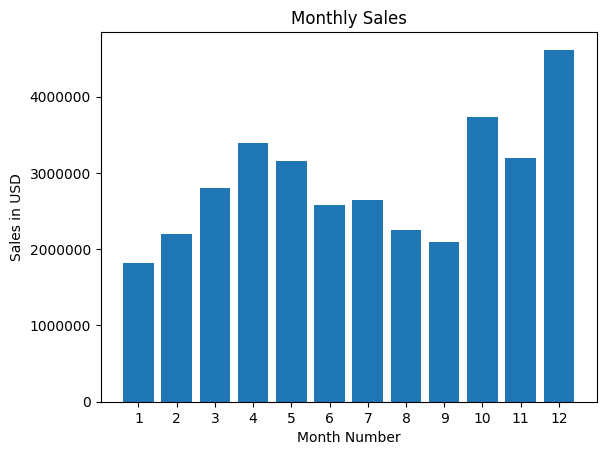

In [16]:
months = range(1,13)
plt.bar(months,results['Total_Price'])
plt.ticklabel_format(style='plain')
plt.xticks(months)
plt.title('Monthly Sales')
plt.xlabel('Month Number')
plt.ylabel('Sales in USD')
plt.show()

#### TASK: What city had the highest number in sales?

In [17]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Total_Price
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",1700.00
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",600.00
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",11.95
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",149.99
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",11.95


#### Must create column to organize by city

#### Split Col by comma. Pre comma is address. Mid Comma is City. Post comma is state and zip code

In [50]:
def get_city(address):
    return address.split(',')[1]
def get_state(address):
    return address.split(',')[2][:3].strip()

all_data['City'] = all_data['Purchase Address'].apply(lambda x: get_city(x) + ' (' + get_state(x)+')')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Total_Price,City
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",1700.00,New York City (NY)
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",600.00,New York City (NY)
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",11.95,New York City (NY)
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",149.99,San Francisco (CA)
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",11.95,Atlanta (GA)


#### ANSWER: Group by city to see highest number of sales

In [55]:
city_results = all_data.groupby('City').sum(numeric_only=True)
city_results

,Quantity Ordered,Price Each,Total_Price
City,,,
Atlanta (GA),16602,2779908.20,2795498.58
Austin (TX),11153,1809873.61,1819581.75
Boston (MA),22528,3637409.77,3661642.01
Dallas (TX),16730,2752627.82,2767975.40
Los Angeles (CA),33289,5421435.23,5452570.80
New York City (NY),27932,4635370.83,4664317.43
Portland (ME),2750,447189.25,449758.27
Portland (OR),11303,1860558.22,1870732.34
San Francisco (CA),50239,8211461.74,8262203.91


/var/folders/nx/h1b8rcfx71v_7xxcdh7hdslc0000gn/T/ipykernel_86845/565970470.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])


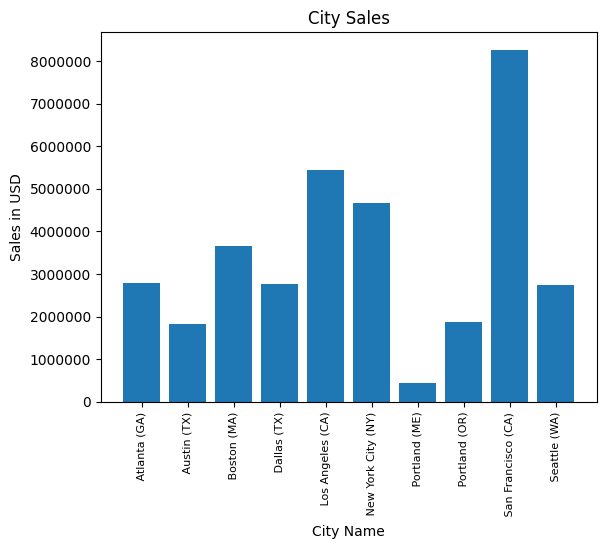

In [64]:
months = range(1,13)

cities = [city for city, df in all_data.groupby('City')]

plt.bar(cities,city_results['Total_Price'])

#convert from scientific notation to number
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])


plt.xticks(cities,rotation = 'vertical',size = 8)
plt.title('City Sales')
plt.xlabel('City Name')
plt.ylabel('Sales in USD')
plt.show()

#### TASK: What time should we display advertisements to maximize customer buying product?

In [68]:
#use datetime to extract hour and minute
all_data['Hour'] = all_data['Order Date'].dt.hour
all_data['Minute'] = all_data['Order Date'].dt.minute
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Total_Price,City,Hour,Minute
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",1700.00,New York City (NY),0,1
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",600.00,New York City (NY),7,3
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",11.95,New York City (NY),18,21
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",149.99,San Francisco (CA),15,13
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",11.95,Atlanta (GA),12,38


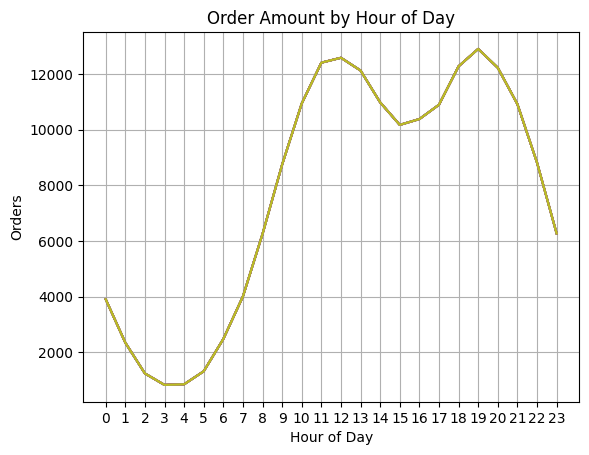

In [76]:
hours = [hour for hour, df in all_data.groupby('Hour')]

plt.plot(hours,all_data.groupby(['Hour']).count())
plt.xticks(hours)
plt.grid()
plt.title('Order Amount by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Orders')
plt.show()
#11AM and 7PM are the peaks

#### What products are most often sold together?

#### Start by grouping by orderid and see which products are sold together

In [110]:
df = all_data[all_data['Order ID'].duplicated(keep=False)]

df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df2 = df[['Order ID', 'Grouped']].drop_duplicates()

/var/folders/nx/h1b8rcfx71v_7xxcdh7hdslc0000gn/T/ipykernel_86845/3593477360.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


In [111]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in df2['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

for key,value in count.most_common(10):
    print(key, value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


#### Which product sold the most?

/var/folders/nx/h1b8rcfx71v_7xxcdh7hdslc0000gn/T/ipykernel_86845/3289712273.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  quantity_ordered = product_group.sum()['Quantity Ordered']


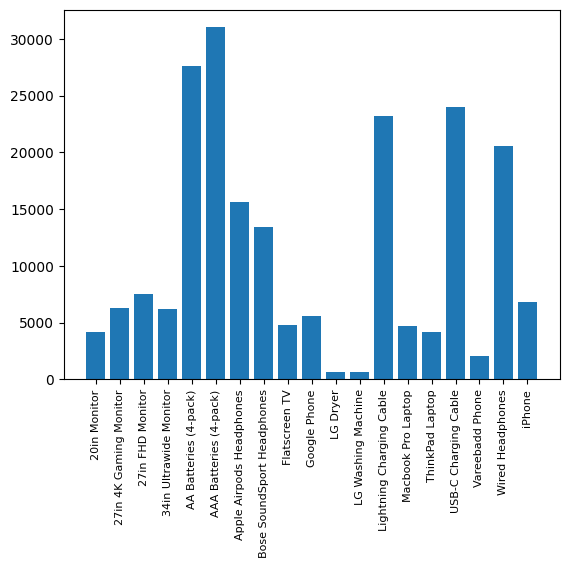

In [112]:
product_group = all_data.groupby('Product')
quantity_ordered = product_group.sum()['Quantity Ordered']

keys = [pair for pair, df in product_group]
plt.bar(keys, quantity_ordered)
plt.xticks(keys, rotation='vertical', size=8)
plt.show()